# KMENSAH_ASSIGNMENT4

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    #confusion_matrix,
    #plot_confusion_matrix,
    make_scorer,
)

In [2]:
# To build a Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [3]:
#pip install --upgrade scikit-learn

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Read the dataset

In [5]:
data1 = pd.read_csv("application_train.csv")

In [6]:
# copying data to another varaible to avoid any changes to original data
app_train1 = data1.copy()


In [7]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
app_train1.shape

(307511, 122)

In [9]:
# using .tolist makes Python print all columns, instead of using ellipsis
# We could also configure pandas to do the same.
print(app_train1.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [10]:
app_train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
app_train1['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

# Read the dataset

In [12]:
data4 = pd.read_csv("bureau.csv")

In [13]:
# copying data to another varaible to avoid any changes to original data
bureau = data4.copy()

In [14]:
bureau.shape

(1716428, 17)

In [15]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [16]:
bureau1=bureau[['SK_ID_CURR','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_OVERDUE']].copy()

In [17]:
bureau1.shape

(1716428, 3)

In [18]:
bureau1.head()

,SK_ID_CURR,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE
0,215354,0,0.0
1,215354,0,0.0
2,215354,0,0.0
3,215354,0,0.0
4,215354,0,0.0


In [19]:
bureau1.tail()

,SK_ID_CURR,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE
1716423,259355,0,0.0
1716424,100044,0,0.0
1716425,100044,0,0.0
1716426,246829,0,0.0
1716427,246829,0,0.0


In [20]:
#Pandas - groupby one column and get mean of other two columns

In [21]:
bureau2=bureau1.groupby('SK_ID_CURR').mean()

In [22]:
bureau2.shape

(305811, 2)

In [23]:
app_train1.shape

(307511, 122)

In [24]:
app_train=pd.merge(app_train1, bureau2, on = "SK_ID_CURR", how = "left")

In [25]:
app_train.shape

(307511, 124)

In [26]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to AMT_CREDIT_SUM_OVERDUE
dtypes: float64(67), int64(41), object(16)
memory usage: 293.3+ MB


In [27]:
#Now we continue steps from Week 2

# CREATE DATEFRAME FOR PLOTS AFTER DECIDING ON VARIABLES

In [28]:
data=app_train

# MISSING VALUE

In [29]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100*df.isnull().sum() / len(df)
    
    mis_val_table =pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending = False).round(1)
    
    print('Your selected dataframe has' + str(df.shape[1])+ 'columns.\n'
         "There are" + str(mis_val_table_ren_columns.shape[0])+ 'columns that have missing values.')
    
    return mis_val_table_ren_columns

In [30]:
# missing values check
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has124columns.
There are69columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [31]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    67
int64      41
object     16
dtype: int64

In [32]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis =0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Encoding Categorical Variables

In [33]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
        # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
           
        
            le_count +=1
        
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [34]:
app_train = pd.get_dummies(app_train)


print('Training Feature shape: ', app_train.shape)



Training Feature shape:  (307511, 245)


In [35]:
train_labels =app_train['TARGET']



app_train['TARGET'] =train_labels

print('Training Feature shape: ', app_train.shape)


Training Feature shape:  (307511, 245)


In [36]:
correlations = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(50))
print('\nMost Negative Correlations:\n', correlations.head(50))

Most Positive Correlations:
 ORGANIZATION_TYPE_Security                           0.007226
OCCUPATION_TYPE_Waiters/barmen staff                 0.007802
ORGANIZATION_TYPE_Agriculture                        0.007901
WALLSMATERIAL_MODE_Wooden                            0.007946
CREDIT_DAY_OVERDUE                                   0.008118
ORGANIZATION_TYPE_Trade: type 7                      0.008170
NAME_TYPE_SUITE_Unaccompanied                        0.008301
NAME_INCOME_TYPE_Unemployed                          0.008784
ORGANIZATION_TYPE_Trade: type 3                      0.008911
OBS_60_CNT_SOCIAL_CIRCLE                             0.009022
OBS_30_CNT_SOCIAL_CIRCLE                             0.009131
CNT_FAM_MEMBERS                                      0.009308
ORGANIZATION_TYPE_Industry: type 3                   0.009691
ORGANIZATION_TYPE_Restaurant                         0.010266
NAME_EDUCATION_TYPE_Lower secondary                  0.011747
OCCUPATION_TYPE_Cooking staff            

# From reviewing the correlations above we selected the independent variables below

# Selected Columns

1. SK_ID_CURR---ID of loan in our sample
2. TARGET---Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
3. FLAG_OWN_CAR---Flag if the client owns a car.
4. FLAG_OWN_REALTY---Flag if client owns a house or flat.
5. AMT_INCOME_TOTAL---Income of the client
6. AMT_CREDIT---Credit amount of the loan.
7. NAME_EDUCATION_TYPE---Level of highest education the client achieved.
8. DAYS_BIRTH---Client's age in days at the time of application.
9. DAYS_EMPLOYED---How many days before the application the person started current employment.

10.EXT_SOURCE_1---Normalized score from external data source

11. NAME_INCOME_TYPE---Clients income type (businessman, working, maternity leave,…)
12. CODE_GENDER---Gender of the client
13. OWN_CAR_AGE---Age of client's car

14. REGION_RATING_CLIENT
15. REGION_RATING_CLIENT_W_CITY

In [37]:
loan=app_train[['SK_ID_CURR','TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_EDUCATION_TYPE_Secondary / secondary special','DAYS_BIRTH','DAYS_EMPLOYED','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_INCOME_TYPE_Working','CODE_GENDER_M','CODE_GENDER_F','OWN_CAR_AGE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']]

In [38]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   FLAG_OWN_CAR                                       307511 non-null  int32  
 3   FLAG_OWN_REALTY                                    307511 non-null  int32  
 4   AMT_INCOME_TOTAL                                   307511 non-null  float64
 5   AMT_CREDIT                                         307511 non-null  float64
 6   NAME_EDUCATION_TYPE_Secondary / secondary special  307511 non-null  uint8  
 7   DAYS_BIRTH                                         307511 non-null  int64  
 8   DAYS_EMPLOYED                                      307511 non-null  int64 

In [39]:
loan["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [40]:
loan.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_INCOME_TYPE_Working,CODE_GENDER_M,CODE_GENDER_F,OWN_CAR_AGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,100002,1,0,1,202500.0,406597.5,1,-9461,-637,0.083037,0.262949,0.139376,1,1,0,NaN,2,2
1,100003,0,0,0,270000.0,1293502.5,0,-16765,-1188,0.311267,0.622246,NaN,0,0,1,NaN,1,1
2,100004,0,1,1,67500.0,135000.0,1,-19046,-225,NaN,0.555912,0.729567,1,1,0,26.0,2,2
3,100006,0,0,1,135000.0,312682.5,1,-19005,-3039,NaN,0.650442,NaN,1,0,1,NaN,2,2
4,100007,0,0,1,121500.0,513000.0,1,-19932,-3038,NaN,0.322738,NaN,1,1,0,NaN,2,2


In [41]:
#We Do a Bivariate Analysis and pair plots to gain some additional insights

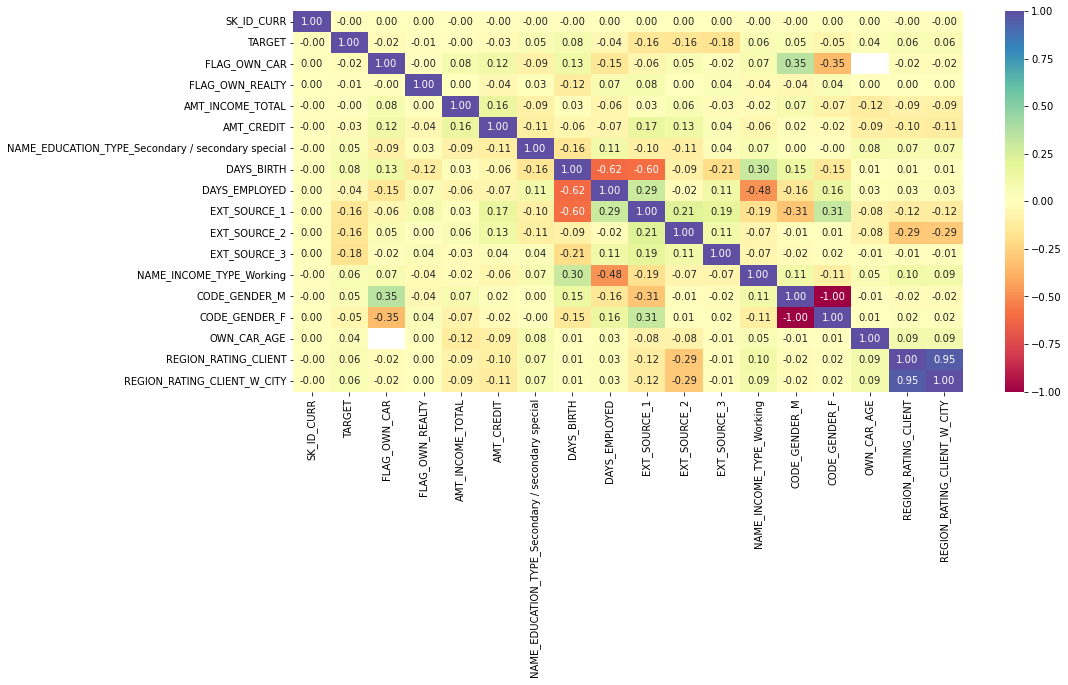

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [43]:
#Multivariate Analysis

In [44]:
numeric_cols = loan.select_dtypes(include=[np.number]).columns


print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'NAME_INCOME_TYPE_Working', 'CODE_GENDER_M', 'CODE_GENDER_F',
       'OWN_CAR_AGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')


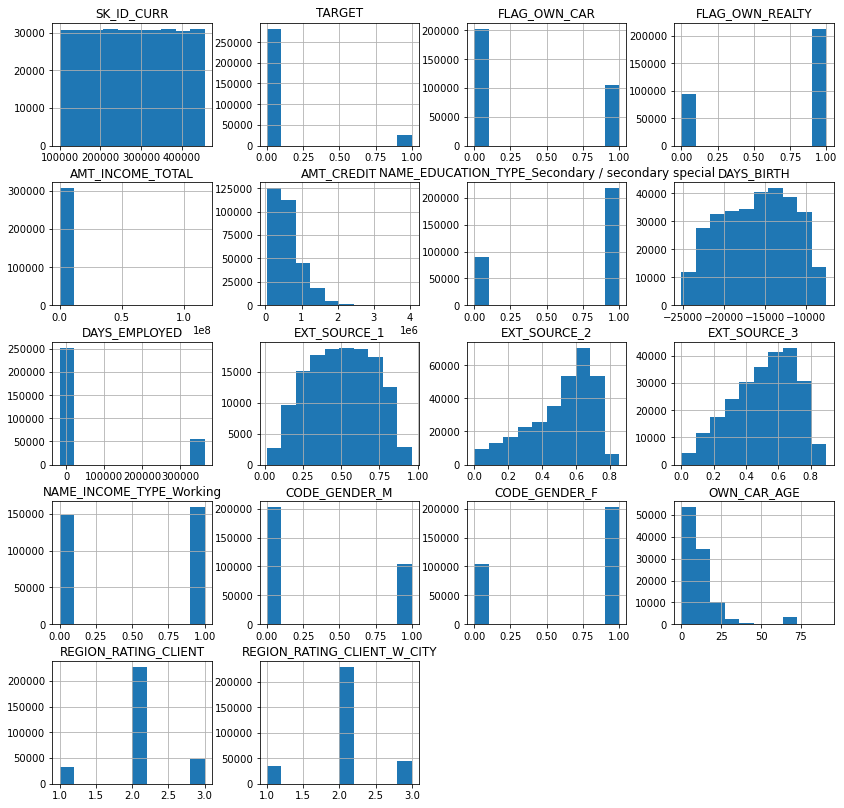

In [45]:
# creating histograms
loan[numeric_cols].hist(figsize=(14, 14))
plt.show()

# Check for missing values on Selected Variables/Columns 

In [46]:
loan.isnull().sum()

SK_ID_CURR                                                0
TARGET                                                    0
FLAG_OWN_CAR                                              0
FLAG_OWN_REALTY                                           0
AMT_INCOME_TOTAL                                          0
AMT_CREDIT                                                0
NAME_EDUCATION_TYPE_Secondary / secondary special         0
DAYS_BIRTH                                                0
DAYS_EMPLOYED                                             0
EXT_SOURCE_1                                         173378
EXT_SOURCE_2                                            660
EXT_SOURCE_3                                          60965
NAME_INCOME_TYPE_Working                                  0
CODE_GENDER_M                                             0
CODE_GENDER_F                                             0
OWN_CAR_AGE                                          202929
REGION_RATING_CLIENT                    

In [47]:
#We will select Eleven for this exercise we will add REGION_RATING_CLIENT

# FINAL Eleven

From above the Final 11 Variables to be focused on will be:

    1. FLAG_OWN_CAR
    
    2. FLAG_OWN_REALTY
    
    3. AMT_INCOME_TOTAL
    
    4. AMT_CREDIT
    
    5. NAME_EDUCATION_TYPE
    
    6. DAYS_BIRTH
    
    7. DAYS_EMPLOYED
    
    8. EXT_SOURCE_2
    
    9. NAME_INCOME_TYPE
    
    10. CODE_GENDER
    
    11. REGION_RATING_CLIENT
    
    
    These 11 were selected because based on research of the domain, strong correlation to TARGET and minimal missing values which will  require substantial imputation of values.
    

# Model Building Approach

1. Data preparation
2. Partition the data into train and test set.
3. Build a model on the train data.
4. Tune/Oversample/Undersample the model if required.

In [48]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   FLAG_OWN_CAR                                       307511 non-null  int32  
 3   FLAG_OWN_REALTY                                    307511 non-null  int32  
 4   AMT_INCOME_TOTAL                                   307511 non-null  float64
 5   AMT_CREDIT                                         307511 non-null  float64
 6   NAME_EDUCATION_TYPE_Secondary / secondary special  307511 non-null  uint8  
 7   DAYS_BIRTH                                         307511 non-null  int64  
 8   DAYS_EMPLOYED                                      307511 non-null  int64 

In [49]:
# checking for unique values in ID column
loan["SK_ID_CURR"].nunique()

307511

Since all the values in SK_ID_CURR column are unique we can drop it

In [50]:
loan11=data[['TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_EDUCATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','EXT_SOURCE_2','NAME_INCOME_TYPE','CODE_GENDER','REGION_RATING_CLIENT']]

In [51]:
loan11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TARGET                307511 non-null  int64  
 1   FLAG_OWN_CAR          307511 non-null  int32  
 2   FLAG_OWN_REALTY       307511 non-null  int32  
 3   AMT_INCOME_TOTAL      307511 non-null  float64
 4   AMT_CREDIT            307511 non-null  float64
 5   NAME_EDUCATION_TYPE   307511 non-null  object 
 6   DAYS_BIRTH            307511 non-null  int64  
 7   DAYS_EMPLOYED         307511 non-null  int64  
 8   EXT_SOURCE_2          306851 non-null  float64
 9   NAME_INCOME_TYPE      307511 non-null  object 
 10  CODE_GENDER           307511 non-null  object 
 11  REGION_RATING_CLIENT  307511 non-null  int64  
dtypes: float64(3), int32(2), int64(4), object(3)
memory usage: 28.2+ MB


In [52]:
loan11.isnull().sum()

TARGET                    0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
NAME_EDUCATION_TYPE       0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
EXT_SOURCE_2            660
NAME_INCOME_TYPE          0
CODE_GENDER               0
REGION_RATING_CLIENT      0
dtype: int64

# Missing Value Treatment

In [53]:
print('Imputing median value for EXT_SOURCE_2 with Nan values:')
loan11['EXT_SOURCE_2'].fillna(loan11['EXT_SOURCE_2'].median(), inplace=True)
print('Imputing done. Lets check if any of records have Nan Seats')
print(loan11[loan11['EXT_SOURCE_2'].isna()].count().sum())
print('EXT_SOURCE_2:')
loan11['EXT_SOURCE_2'].value_counts()

Imputing median value for EXT_SOURCE_2 with Nan values:
Imputing done. Lets check if any of records have Nan Seats
0
EXT_SOURCE_2:


0.285898    721
0.565961    662
0.262258    417
0.265256    343
0.159679    322
           ... 
0.115152      1
0.062815      1
0.009800      1
0.150713      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [54]:
loan11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TARGET                307511 non-null  int64  
 1   FLAG_OWN_CAR          307511 non-null  int32  
 2   FLAG_OWN_REALTY       307511 non-null  int32  
 3   AMT_INCOME_TOTAL      307511 non-null  float64
 4   AMT_CREDIT            307511 non-null  float64
 5   NAME_EDUCATION_TYPE   307511 non-null  object 
 6   DAYS_BIRTH            307511 non-null  int64  
 7   DAYS_EMPLOYED         307511 non-null  int64  
 8   EXT_SOURCE_2          307511 non-null  float64
 9   NAME_INCOME_TYPE      307511 non-null  object 
 10  CODE_GENDER           307511 non-null  object 
 11  REGION_RATING_CLIENT  307511 non-null  int64  
dtypes: float64(3), int32(2), int64(4), object(3)
memory usage: 28.2+ MB


In [55]:
loan11.isnull().sum()

TARGET                  0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
NAME_EDUCATION_TYPE     0
DAYS_BIRTH              0
DAYS_EMPLOYED           0
EXT_SOURCE_2            0
NAME_INCOME_TYPE        0
CODE_GENDER             0
REGION_RATING_CLIENT    0
dtype: int64

In [56]:
#Select a sample of 1000. Using the full population of the app_train dataset requires 300 GB RAM that I do not have

In [57]:
loan12=loan11.sample(n=1000, random_state=1)

Split Data

In [58]:
# separating the independent and dependent variables

X = loan12.drop(["TARGET"], axis=1)
y = loan12["TARGET"]

In [59]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,CODE_GENDER_M
64282,0,1,135000.0,654498.0,-20614,365243,0.622652,2,0,0,0,1,1,0,0,0
94645,1,1,135000.0,234576.0,-9080,-1080,0.655960,2,0,0,0,1,0,0,1,1
306349,1,1,112500.0,157914.0,-15933,-114,0.670793,1,0,0,0,1,0,0,1,1
258314,1,0,247500.0,1125000.0,-9926,-1061,0.486120,2,0,1,0,0,0,0,1,1
87597,0,1,202500.0,900000.0,-11757,-1593,0.247563,2,0,0,0,1,0,0,1,1


# Splitting the data into X and y

In [60]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(640, 16) (160, 16) (200, 16)


In [61]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
0    0.929
1    0.071
Name: TARGET, dtype: float64
********************************************************************************
Target value ratio in y_train
0    0.928125
1    0.071875
Name: TARGET, dtype: float64
********************************************************************************
Target value ratio in y_val
0    0.93125
1    0.06875
Name: TARGET, dtype: float64
********************************************************************************
Target value ratio in y_test
0    0.93
1    0.07
Name: TARGET, dtype: float64
********************************************************************************


# Hyperparameter Tuning

# Let's first build a model with default parameters and see it's performance

In [62]:
# model without hyperparameter tuning
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Let's check model's performance

In [63]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf.predict(X_train)))
print(recall_score(y_val, rf.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, rf.predict(X_train)))
print(precision_score(y_val, rf.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, rf.predict(X_train)))
print(accuracy_score(y_val, rf.predict(X_val)))

Recall on train and validation set
0.9782608695652174
0.0

Precision on train and validation set
1.0
0.0

Accuracy on train and validation set
0.9984375
0.925


Grid Search CV

Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
It is an exhaustive search that is performed on the specific parameter values of a model.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

# How to know the hyperparameters available for an algorithm?

In [64]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We can see the names of hyperparameters available and their default values.

We can choose which ones to tune.

In [65]:
print(np.arange(0.2, 0.7, 0.1))

print(np.arange(5,10))

[0.2 0.3 0.4 0.5 0.6]
[5 6 7 8 9]


# Let's tune Random forest using Grid Search

In [66]:
%%time

# Choose the type of classifier. 
rf1 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf1, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Wall time: 15min 30s


{'class_weight': 'balanced_subsample',
 'max_depth': 3,
 'max_features': 0.2,
 'max_samples': 0.6000000000000001,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 8,
 'n_estimators': 150}

Let's check the best CV score, for the obtained parameters

In [67]:
grid_obj.best_score_

0.37555555555555553

Let's build a model with obtained best parameter

We are hard coding the hyperparameters separately so that we don't have to run the grid search again.

In [68]:
# Set the clf to the best combination of parameters
rf1_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.2,
    max_samples=0.6000000000000001,
    min_samples_leaf=5,
    n_estimators=150,
    max_depth=3,
    random_state=1,
    min_impurity_decrease=0.001,
)

# Fit the best algorithm to the data.
rf1_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.6000000000000001,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

Let's check the model's performance

In [69]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf1_tuned.predict(X_train)))
print(recall_score(y_val, rf1_tuned.predict(X_val)))
print("")

# Checking precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, rf1_tuned.predict(X_train)))
print(precision_score(y_val, rf1_tuned.predict(X_val)))
print("")

# Checking accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, rf1_tuned.predict(X_train)))
print(accuracy_score(y_val, rf1_tuned.predict(X_val)))

Recall on train and validation set
0.6739130434782609
0.18181818181818182

Precision on train and validation set
0.25833333333333336
0.07142857142857142

Accuracy on train and validation set
0.8375
0.78125


# Randomized Search CV

Random search is a tuning technique that attempts to compute the optimum values of hyperparameters randomly unlike grid search

# Let's tune Random forest using Randomized Search

In [70]:
%%time

# Choose the type of classifier. 
rf2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1), 
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth":np.arange(3,4,5),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(rf2, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Wall time: 19.5 s


{'n_estimators': 150,
 'min_samples_leaf': 8,
 'min_impurity_decrease': 0.002,
 'max_samples': 0.6000000000000001,
 'max_features': 0.2,
 'max_depth': 3,
 'class_weight': 'balanced_subsample'}

In [ ]:
Let's check the best CV score, for the obtained parameters

In [71]:
grid_obj.best_score_

0.37555555555555553

In [72]:
# Set the clf to the best combination of parameters
rf2_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.2,
    max_samples=0.5,
    min_samples_leaf=5,
    n_estimators=150,
    random_state=1,
    max_depth=3,
    min_impurity_decrease=0.003,
)

# Fit the best algorithm to the data.
rf2_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.5, min_impurity_decrease=0.003,
                       min_samples_leaf=5, n_estimators=150, random_state=1)

Different results from the grid and the random search


Randomised search might give better results than grid search for the same parameter grid because of the use of cross-validation as fold varies the scores also vary

Let's check the model's performance

In [73]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf2_tuned.predict(X_train)))
print(recall_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train, rf2_tuned.predict(X_train)))
print(precision_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train, rf2_tuned.predict(X_train)))
print(accuracy_score(y_val, rf2_tuned.predict(X_val)))

Recall on train and validation set
0.6086956521739131
0.18181818181818182

Precision on train and validation set
0.28
0.08333333333333333

Accuracy on train and validation set
0.859375
0.80625


# Choose a best model and predict the performance on the test set

In [74]:
model = rf1_tuned

In [75]:
# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, model.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, model.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, model.predict(X_test)))

Recall on test set
0.5714285714285714

Precision on test set
0.21052631578947367

Accuracy on test set
0.82
